# Regression project

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#%matplotlib inline|

# Reading the data in

In [23]:
df = pd.read_csv("housprice.csv")

# take a look at the dataset
df.head()
#df["ENGINESIZE"].head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# Data Exploration

In [24]:
# summarize the data
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [25]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')


In [26]:
df.describe()

,Area,Room,Price,Price(USD)
count,3473.000000,3479.000000,3.479000e+03,3.479000e+03
mean,106.774547,2.079908,5.359023e+09,1.786341e+05
std,69.365567,0.758275,8.099935e+09,2.699978e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [27]:
df_f = df.dropna(subset=['Area'])

In [28]:
df_f.describe()

,Area,Room,Price,Price(USD)
count,3473.000000,3473.000000,3.473000e+03,3.473000e+03
mean,106.774547,2.079758,5.354621e+09,1.784874e+05
std,69.365567,0.758764,8.104058e+09,2.701353e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.415000e+09,4.716667e+04
50%,90.000000,2.000000,2.880000e+09,9.600000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [29]:
df_f = df_f.dropna(subset=['Address'])

In [30]:
df_f.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [31]:
# Target Encoding
# محاسبه قیمت بر متر مربع
df_f['Price_per_sqm'] = df_f['Price'] / df_f['Area']

# محاسبه میانگین قیمت بر متر مربع برای هر آدرس
df_f['Address_encoded'] = df_f.groupby('Address')['Price_per_sqm'].transform('mean')

# نمایش داده‌ها برای مشاهده
df_f[['Address', 'Price', 'Area', 'Price_per_sqm', 'Address_encoded']].head()

#df_f['Address_encoded'] = df_f.groupby('Address')['Price'].transform('mean')
df_f.describe()

,Area,Room,Price,Price(USD),Price_per_sqm,Address_encoded
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05,4.127424e+07,4.127424e+07
std,69.550976,0.760216,8.125918e+09,2.708639e+05,3.165831e+07,2.665982e+07
min,30.000000,0.000000,3.600000e+06,1.200000e+02,2.250000e+04,4.166667e+06
25%,69.000000,2.000000,1.419250e+09,4.730833e+04,2.000000e+07,2.279330e+07
50%,90.000000,2.000000,2.900000e+09,9.666667e+04,3.472953e+07,3.716342e+07
75%,120.000000,2.000000,6.000000e+09,2.000000e+05,5.497232e+07,5.764036e+07
max,929.000000,5.000000,9.240000e+10,3.080000e+06,4.166667e+08,1.400000e+08


In [32]:
cdf = df_f[['Area','Room','Price','Price(USD)','Address_encoded']]
cdf.head(9)

,Area,Room,Price,Price(USD),Address_encoded
0,63.0,1,1.850000e+09,61666.67,3.636805e+07
1,60.0,1,1.850000e+09,61666.67,3.636805e+07
2,79.0,2,5.500000e+08,18333.33,7.900050e+06
3,95.0,2,9.025000e+08,30083.33,9.818188e+06
4,123.0,2,7.000000e+09,233333.33,8.319035e+07
5,70.0,2,2.050000e+09,68333.33,4.688898e+07
6,87.0,2,6.000000e+08,20000.00,7.900050e+06
7,59.0,1,2.150000e+09,71666.67,3.636805e+07
8,54.0,2,4.930000e+08,16433.33,1.392895e+07


# Visualization

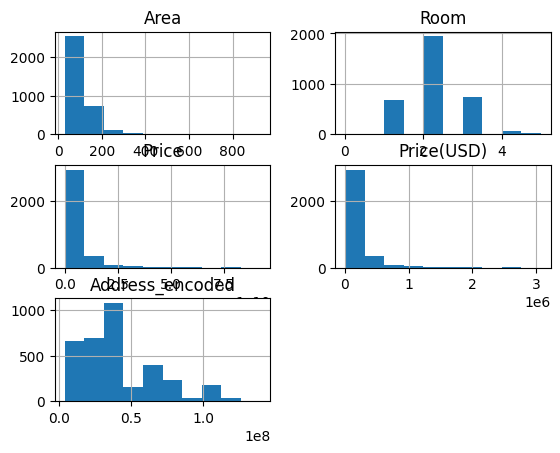

In [33]:
viz = cdf[['Area','Room','Price','Price(USD)','Address_encoded']]
viz.hist()
plt.show()

# plots

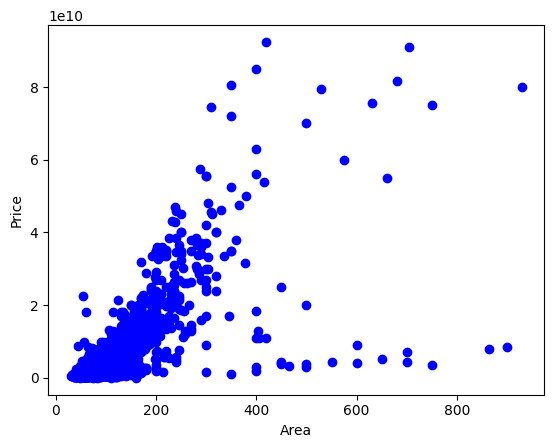

In [34]:
plt.scatter(cdf.Area, cdf.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

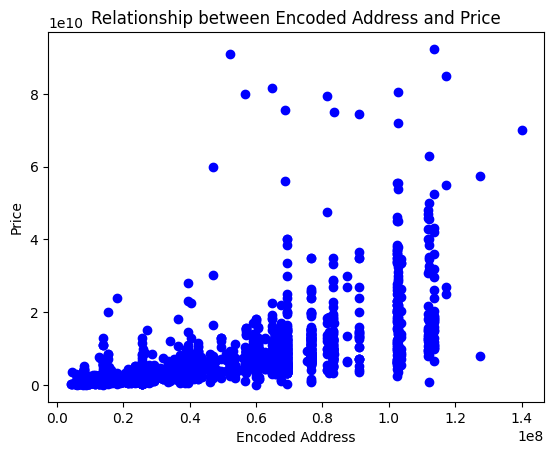

In [35]:


# رسم نمودار رابطه بین Address_encoded و Price
plt.scatter(df_f['Address_encoded'], df_f['Price'], color='blue')
plt.xlabel('Encoded Address')
plt.ylabel('Price')
plt.title('Relationship between Encoded Address and Price')
plt.show()


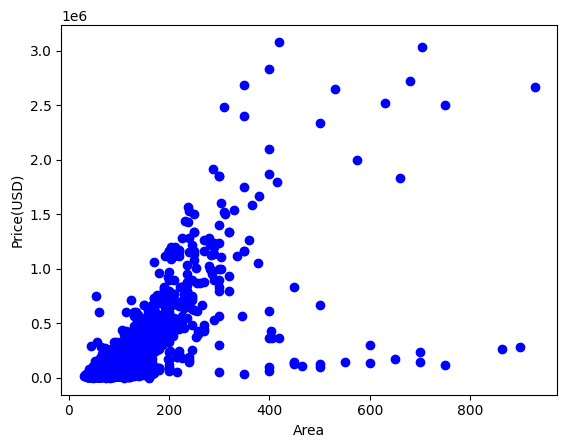

In [36]:
plt.scatter(cdf.Area, cdf['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

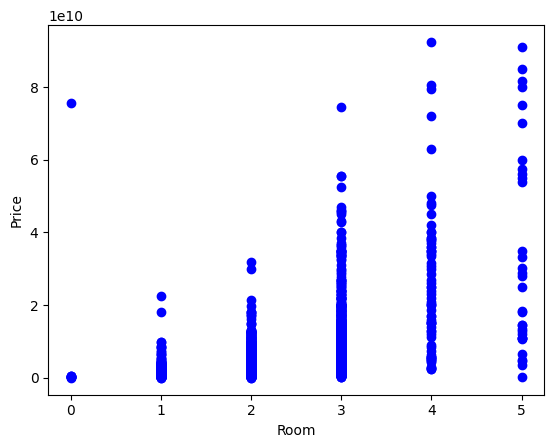

In [37]:
plt.scatter(cdf.Room, cdf.Price,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

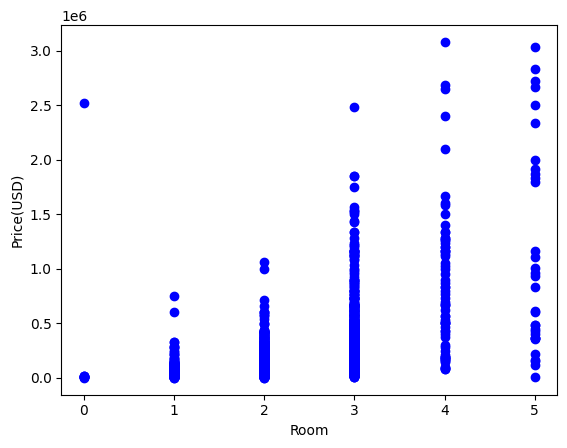

In [38]:
plt.scatter(cdf.Room, cdf['Price(USD)'],  color='blue')
plt.xlabel("Room")
plt.ylabel("Price(USD)")
plt.show()

# teat and train

In [39]:
msk = np.random.rand(len(df_f)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train)
print(test)

[ True  True  True ... False  True  True]
[False False False ...  True False False]
       Area  Room         Price  Price(USD)  Address_encoded
0      63.0     1  1.850000e+09    61666.67     3.636805e+07
1      60.0     1  1.850000e+09    61666.67     3.636805e+07
2      79.0     2  5.500000e+08    18333.33     7.900050e+06
3      95.0     2  9.025000e+08    30083.33     9.818188e+06
4     123.0     2  7.000000e+09   233333.33     8.319035e+07
...     ...   ...           ...         ...              ...
3474   86.0     2  3.500000e+09   116666.67     3.862659e+07
3475   83.0     2  6.800000e+09   226666.67     1.027806e+08
3476   75.0     2  3.650000e+08    12166.67     6.107964e+06
3477  105.0     2  5.600000e+09   186666.67     8.147615e+07
3478   82.0     2  3.600000e+08    12000.00     6.107964e+06

[3450 rows x 5 columns]
       Area  Room         Price  Price(USD)  Address_encoded
0      63.0     1  1.850000e+09    61666.67     3.636805e+07
1      60.0     1  1.850000e+09    61

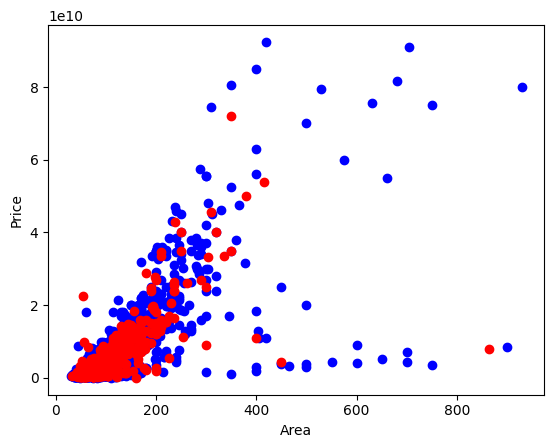

In [40]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train.Area, train.Price,  color='blue')
ax1.scatter(test.Area, test.Price,  color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Address_encoded']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[6.38632200e+07 2.40937049e+08 1.35669036e+02]]
Intercept:  [-7.5436223e+09]


Text(0, 0.5, 'Price')

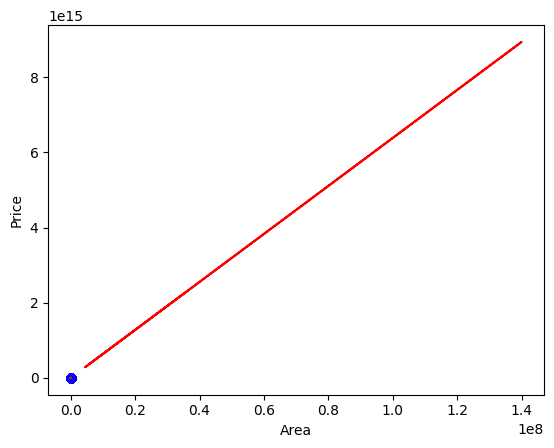

In [42]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#Y = np.log(train_x)
#plt.plot(train_x, Y, '-r')
plt.xlabel("Area")
plt.ylabel("Price")

In [43]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area','Room', 'Address_encoded']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2098715140.02
Residual sum of squares (MSE): 17692010800932200448.00
R2-score: 0.67


In [44]:
# Target Encoding
df_f['Address_encoded'] = df_f.groupby('Address')['Price'].transform('mean')


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ویژگی‌ها شامل Address_encoded و سایر ستون‌ها
X = df_f[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_encoded']]  # افزودن Address_encoded
y = df_f['Price']  # یا 'Price(USD)'

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل رگرسیون
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی مدل
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Residual sum of squares (MSE):", mean_squared_error(y_test, y_pred))
print("R2-score:", r2_score(y_test, y_pred))


Mean absolute error: 2143126788.470132
Residual sum of squares (MSE): 2.4268525070190793e+19
R2-score: 0.679228269299482
